In [1]:
#!/usr/bin/python
import nltk
import numpy as np
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
from random import randint
from sklearn.model_selection import train_test_split
import random

Importing Glove and  40000 words list 

In [2]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))
print(wordVectors.shape)
print(wordsList[5066])
print(wordVectors[5066][:])

Loaded the word list!
Loaded the word vectors!
400000
(400000, 50)
closure
[ 0.50653   0.12284  -0.11653  -0.21052  -1.0672   -0.17536   0.16253
  0.76781   0.25517  -0.15995   0.025424 -0.65425  -0.44638  -0.19395
  0.45319   1.0955    0.050096 -0.36712   0.1729    0.28393   0.85448
 -0.54932  -1.1816    0.066158 -0.58561  -0.84893   0.1947    0.37832
  0.94141   0.62982   2.3869   -0.41035  -0.11599   0.049907 -0.41563
 -0.056999  1.5044   -0.93772  -0.16045   0.80019  -0.44448  -0.50036
  0.065875  0.27778  -0.27505  -0.012317 -0.37458   0.49171  -0.35498
  0.035347]


Importing the Dataset 

In [3]:
#--------------------Extracting Emotion && sentences from corpus
def extract(dataset):
    f = open(dataset, 'r+')
    linea = f.readline()
    emotion = []
    sentences = []
    neutro = re.compile('^ne')
    while linea != "":    
        #Ignoramos Neutro emotions
        if not re.match(neutro, linea):
            #print("** ",linea)
            linea = linea.split("#")
            #Obtaining the emocion
            emotion.append(int(linea[0]))
            sentences.append(linea[1])
        linea = f.readline()
    f.close()
    return sentences,emotion

dataset = "Heterogenious_Dataset/dataset.txt"
sentences,emotion = extract(dataset)
print(emotion[0]," ",sentences[0])
print("Labels: ",len(emotion), "Sentences: ",len(sentences))

2   Mortar assault leaves at least 18 dead

Labels:  3695 Sentences:  3695


In [4]:
print(emotion[0])

2


Cuánto hay de cada emoción

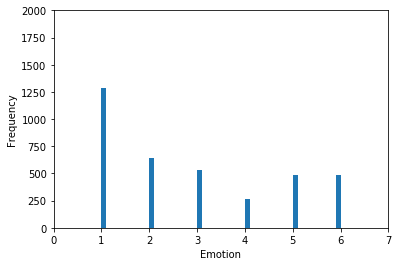

In [5]:
import matplotlib.pyplot as plt
import collections
%matplotlib inline
def histograma(emotion):
    #print(emotion)
    plt.hist(emotion, 50)
    plt.xlabel('Emotion')
    plt.ylabel('Frequency')
    plt.axis([0, 7, 0, 2000])
    plt.show()
histograma(emotion)

Preprocesing of Sentences

In [6]:
def decontracted(phrase):
    # specific
    '''phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)'''

    if phrase == "t":
        phrase = "not"
    elif phrase == "re":
        phrase = "are"
    elif phrase == "s":
        phrase = "is"
    elif phrase == "d":
        phrase = "would"
    elif phrase == "ve":
        phrase = "have"
    elif phrase == "m":
        phrase = "am"
    elif phrase == "ca":
        phrase = "can"
    elif phrase == "isn":
        phrase = "is"
    elif phrase == "aren":
        phrase = "are"
    elif phrase == "wouldn":
        phrase = "would"

    # general
    '''phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)'''
    return phrase

In [7]:
#----------------Cleanning Sentences--------------
def cleaner(sent):
    for s in range(0,len(sent)):
        print(sent[s])
        sent[s] = sent[s].lower()
        sent[s] = WordPunctTokenizer().tokenize(sent[s])#nltk.word_tokenize(sent[s])
        #print(sent[s])
        for word in range(0,len(sent[s])):
            sent[s][word] = decontracted(sent[s][word])
            sent[s][word] = re.sub(r'[^a-zA-Z0-9\s]', ' ', sent[s][word])
            sent[s][word] = sent[s][word].strip()
            
        sent[s] = list(filter(None, sent[s])) # fastest
        print(sent[s])
        print("-----------")
    return sent

c_sent = sentences[:]    
c_sent = cleaner(c_sent)
print(c_sent[0])

Mortar assault leaves at least 18 dead

['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
-----------
Goal delight for Sheva

['goal', 'delight', 'for', 'sheva']
-----------
Nigeria hostage feared dead is freed

['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
-----------
Bombers kill shoppers

['bombers', 'kill', 'shoppers']
-----------
Vegetables, not fruit, slow brain decline

['vegetables', 'not', 'fruit', 'slow', 'brain', 'decline']
-----------
PM: Havana deal a good experiment

['pm', 'havana', 'deal', 'a', 'good', 'experiment']
-----------
Kate is marrying Doherty

['kate', 'is', 'marrying', 'doherty']
-----------
NASA revisiting life on Mars question

['nasa', 'revisiting', 'life', 'on', 'mars', 'question']
-----------
Happy birthday, iPod

['happy', 'birthday', 'ipod']
-----------
Alonso would be happy to retire with three titles

['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']
-----------
Madonna's New Tot 'Happy at Home' in Lon

['vaccine', 'mandate', 'upsets', 'legislators']
-----------
News analysis: Iranian boast is put to test

['news', 'analysis', 'iranian', 'boast', 'is', 'put', 'to', 'test']
-----------
Panel issues bleak report on climate change

['panel', 'issues', 'bleak', 'report', 'on', 'climate', 'change']
-----------
Virtual 'American Idol' hits right notes

['virtual', 'american', 'idol', 'hits', 'right', 'notes']
-----------
Iraq car bombings kill 22 People, wound more than 60

['iraq', 'car', 'bombings', 'kill', '22', 'people', 'wound', 'more', 'than', '60']
-----------
'Stomp' steps to No. 1 at box office

['stomp', 'steps', 'to', 'no', '1', 'at', 'box', 'office']
-----------
Google executive acts as goodwill envoy

['google', 'executive', 'acts', 'as', 'goodwill', 'envoy']
-----------
Filipino woman kidnapped in Nigeria

['filipino', 'woman', 'kidnapped', 'in', 'nigeria']
-----------
Seahawks, Bears vie for shot at NFL title

['seahawks', 'bears', 'vie', 'for', 'shot', 'at', 'nfl', 'title']


['donald', 'and', 'goydos', 'share', 'sony', 'lead']
-----------
U.S. and Iraqis are wrangling over war plans

['u', 'is', 'and', 'iraqis', 'are', 'wrangling', 'over', 'war', 'plans']
-----------
Sea search for missing Microsoft scientist

['sea', 'search', 'for', 'missing', 'microsoft', 'scientist']
-----------
Iran to Hit US Interests if Attacked

['iran', 'to', 'hit', 'us', 'interests', 'if', 'attacked']
-----------
Blair: Terror battle will be long

['blair', 'terror', 'battle', 'will', 'be', 'long']
-----------
Bear cub returned to the wilderness

['bear', 'cub', 'returned', 'to', 'the', 'wilderness']
-----------
Carrefour sales growth falls short

['carrefour', 'sales', 'growth', 'falls', 'short']
-----------
Allied with democrats, Lieberman easily aligns with Republicans

['allied', 'with', 'democrats', 'lieberman', 'easily', 'aligns', 'with', 'republicans']
-----------
In the Rockies, pines die and bears feel it

['in', 'the', 'rockies', 'pines', 'die', 'and', 'bears', 'feel', 

Afghan forces retake town that was overrun by Taliban

['afghan', 'forces', 'retake', 'town', 'that', 'was', 'overrun', 'by', 'taliban']
-----------
Taliban seize rural district in southwest as police flee

['taliban', 'seize', 'rural', 'district', 'in', 'southwest', 'as', 'police', 'flee']
-----------
Afghan poppy war alienates farmers

['afghan', 'poppy', 'war', 'alienates', 'farmers']
-----------
Will North Korea honor pledge this time?

['will', 'north', 'korea', 'honor', 'pledge', 'this', 'time']
-----------
Kim Jong-il bans Japanese cars in North Korea

['kim', 'jong', 'il', 'bans', 'japanese', 'cars', 'in', 'north', 'korea']
-----------
Iran vs. North Korea: not all enemies are equal

['iran', 'vs', 'north', 'korea', 'not', 'all', 'enemies', 'are', 'equal']
-----------
Catholic archbishop outlines Anglican merger hopes

['catholic', 'archbishop', 'outlines', 'anglican', 'merger', 'hopes']
-----------
Anglican and Catholic churches could merge

['anglican', 'and', 'catholic', 'ch

['corn', 'stoves', 'popping', 'up', 'in', 'u', 'is', 'homes']
-----------
Iraq closes borders with Syria and Iran

['iraq', 'closes', 'borders', 'with', 'syria', 'and', 'iran']
-----------
The troubling ending of 'The Departed'

['the', 'troubling', 'ending', 'of', 'the', 'departed']
-----------
Vietnamese bank plans IPO listing

['vietnamese', 'bank', 'plans', 'ipo', 'listing']
-----------
Toyota's Scion parks in Second Life

['toyota', 'is', 'scion', 'parks', 'in', 'second', 'life']
-----------
Obama will run in 2008

['obama', 'will', 'run', 'in', '2008']
-----------
'Cagney & Lacey' finally coming to DVD

['cagney', 'lacey', 'finally', 'coming', 'to', 'dvd']
-----------
Merkel: Stop Iran

['merkel', 'stop', 'iran']
-----------
Salt Lake City mall shooter was teenager

['salt', 'lake', 'city', 'mall', 'shooter', 'was', 'teenager']
-----------
Female astronaut sets record

['female', 'astronaut', 'sets', 'record']
-----------
Oil holds at $58

['oil', 'holds', 'at', '58']
-----------

['new', 'cancer', 'drug', 'to', 'save', 'a', 'thousand', 'lives', 'a', 'year']
-----------
Ex-teacher guilty in nude-pictures scheme

['ex', 'teacher', 'guilty', 'in', 'nude', 'pictures', 'scheme']
-----------
Fire extinguisher part of Tennessee execution kit

['fire', 'extinguisher', 'part', 'of', 'tennessee', 'execution', 'kit']
-----------
Founder returns to Dell helm

['founder', 'returns', 'to', 'dell', 'helm']
-----------
Charles Gibson takes over first place

['charles', 'gibson', 'takes', 'over', 'first', 'place']
-----------
Ex-Border Patrol agent beaten in prison

['ex', 'border', 'patrol', 'agent', 'beaten', 'in', 'prison']
-----------
'Made in China' irks some Burberry shoppers

['made', 'in', 'china', 'irks', 'some', 'burberry', 'shoppers']
-----------
Stonehenge workers' village found

['stonehenge', 'workers', 'village', 'found']
-----------
Who is Prince Frederic von Anhalt?

['who', 'is', 'prince', 'frederic', 'von', 'anhalt']
-----------
Latest food-fad -- 'space pota


['i', 'also', 'found', 'out', 'that', 'junior', 'year', 'will', 'in', 'fact', 'be', 'a', 'bitch']
-----------
You can handle high school drama.") Also, I have so many friends, and all of them are true, caring, trustworthy friends who love me and are supporting me 100%.

['you', 'can', 'handle', 'high', 'school', 'drama', 'also', 'i', 'have', 'so', 'many', 'friends', 'and', 'all', 'of', 'them', 'are', 'true', 'caring', 'trustworthy', 'friends', 'who', 'love', 'me', 'and', 'are', 'supporting', 'me', '100']
-----------
I can come through this year triumphantly and with grace.

['i', 'can', 'come', 'through', 'this', 'year', 'triumphantly', 'and', 'with', 'grace']
-----------
This is my year to be happy.

['this', 'is', 'my', 'year', 'to', 'be', 'happy']
-----------
This is my year to try new things and to succeed!

['this', 'is', 'my', 'year', 'to', 'try', 'new', 'things', 'and', 'to', 'succeed']
-----------
This is my first year of loving myself.

['this', 'is', 'my', 'first', 'year', '

-----------
The OT whoring now is to make enough to pay bills on time, not to buy new and fun things.

['the', 'ot', 'whoring', 'now', 'is', 'to', 'make', 'enough', 'to', 'pay', 'bills', 'on', 'time', 'not', 'to', 'buy', 'new', 'and', 'fun', 'things']
-----------
We just celebrated 3 great months on the 8th, and last night we carved pumpkins (she brought me a pumpkin, it was pretty sweet).

['we', 'just', 'celebrated', '3', 'great', 'months', 'on', 'the', '8th', 'and', 'last', 'night', 'we', 'carved', 'pumpkins', 'she', 'brought', 'me', 'a', 'pumpkin', 'it', 'was', 'pretty', 'sweet']
-----------
Bagpiping got moved to one of our "together" nights, so that puts a small damper on the time we see each other for every week.

['bagpiping', 'got', 'moved', 'to', 'one', 'of', 'our', 'together', 'nights', 'so', 'that', 'puts', 'a', 'small', 'damper', 'on', 'the', 'time', 'we', 'see', 'each', 'other', 'for', 'every', 'week']
-----------
This is good for the odd hour shooter like me1
['this', 'i


['sucks', 'i', 'didn', 'not', 'bring', 'my', 'camera', 'but', 'yeeah']
-----------
&amp; I think tomorrow a friend`s coming over ? Not sure who, haha kaay bye.

['amp', 'i', 'think', 'tomorrow', 'a', 'friend', 'is', 'coming', 'over', 'not', 'sure', 'who', 'haha', 'kaay', 'bye']
-----------
I must say this summer has gone by in the blink of an eye.

['i', 'must', 'say', 'this', 'summer', 'has', 'gone', 'by', 'in', 'the', 'blink', 'of', 'an', 'eye']
-----------
just once I would love to not have to worry about that sort of thing.

['just', 'once', 'i', 'would', 'love', 'to', 'not', 'have', 'to', 'worry', 'about', 'that', 'sort', 'of', 'thing']
-----------
Should be interesting.

['should', 'be', 'interesting']
-----------
I was beginning to worry I'de have to put it off for yet another term.

['i', 'was', 'beginning', 'to', 'worry', 'i', 'de', 'have', 'to', 'put', 'it', 'off', 'for', 'yet', 'another', 'term']
-----------
hey I'll be a rich individual.

['hey', 'i', 'll', 'be', 'a', 'ric

['since', 'school', 'is', 'just', 'starting', 'we', 'have', 'been', 'eating', 'a', 'lot', 'and', 'it', 'is', 'funny', 'because', 'they', 'are', 'letting', 'me', 'get', 'away', 'with', 'going', 'first', 'saying', 'i', 'am', 'eating', 'for', 'two']
-----------
The most exciting time of my whole summer was going to Virginia with the Patricks, Pearsons and Roths, and that lasted less than a week.

['the', 'most', 'exciting', 'time', 'of', 'my', 'whole', 'summer', 'was', 'going', 'to', 'virginia', 'with', 'the', 'patricks', 'pearsons', 'and', 'roths', 'and', 'that', 'lasted', 'less', 'than', 'a', 'week']
-----------
I don't except them to, because my Dad is taking my brother golfing (as previously stated), and my mother hates the mall more than she hates anything else.

['i', 'don', 'not', 'except', 'them', 'to', 'because', 'my', 'dad', 'is', 'taking', 'my', 'brother', 'golfing', 'as', 'previously', 'stated', 'and', 'my', 'mother', 'hates', 'the', 'mall', 'more', 'than', 'she', 'hates', 'an

['you', 'made', 'this', 'trip', 'amazing', 'and', 'i', 'don', 'not', 'know', 'what', 'i', 'am', 'gonna', 'do', 'without', 'you']
-----------
i'm really lucky about that.

['i', 'am', 'really', 'lucky', 'about', 'that']
-----------
i'm actually pretty good at driving a normal car, so i'm excited.

['i', 'am', 'actually', 'pretty', 'good', 'at', 'driving', 'a', 'normal', 'car', 'so', 'i', 'am', 'excited']
-----------
i got some great presents and had an awesome 16th birthday5
['i', 'got', 'some', 'great', 'presents', 'and', 'had', 'an', 'awesome', '16th', 'birthday5']
-----------
I'm loving school at Columbia.

['i', 'am', 'loving', 'school', 'at', 'columbia']
-----------
I feel more at ease now that I kind of know what I want to do with my life, but more scared because I feel like everyone is a step ahead of me6
['i', 'feel', 'more', 'at', 'ease', 'now', 'that', 'i', 'kind', 'of', 'know', 'what', 'i', 'want', 'to', 'do', 'with', 'my', 'life', 'but', 'more', 'scared', 'because', 'i', 'fe

My wife will be anxious!"

['my', 'wife', 'will', 'be', 'anxious']
-----------
Chippy Hackee was not too fat, but he did not want to come; he stayed down below and chuckled.

['chippy', 'hackee', 'was', 'not', 'too', 'fat', 'but', 'he', 'did', 'not', 'want', 'to', 'come', 'he', 'stayed', 'down', 'below', 'and', 'chuckled']
-----------
Chippy Hackee went home in a hurry!

['chippy', 'hackee', 'went', 'home', 'in', 'a', 'hurry']
-----------
They had very small eyes and looked surprised.

['they', 'had', 'very', 'small', 'eyes', 'and', 'looked', 'surprised']
-----------
Mittens laughed so that she fell off the wall.

['mittens', 'laughed', 'so', 'that', 'she', 'fell', 'off', 'the', 'wall']
-----------
"It's a very fine morning!" said Mr. Drake Puddle-duck.

['it', 'is', 'a', 'very', 'fine', 'morning', 'said', 'mr', 'drake', 'puddle', 'duck']
-----------
She pulled them off the wall, smacked them, and took them back to the house.

['she', 'pulled', 'them', 'off', 'the', 'wall', 'smacked', 


['but', 'said', 'roland', 'i', 'counsel', 'you', 'first', 'to', 'take', 'away', 'her', 'magic', 'wand', 'or', 'we', 'cannot', 'escape', 'if', 'she', 'pursues', 'us']
-----------
"That shall not help you," cried she, "even if you have got a long way off, you shall still not escape me."

['that', 'shall', 'not', 'help', 'you', 'cried', 'she', 'even', 'if', 'you', 'have', 'got', 'a', 'long', 'way', 'off', 'you', 'shall', 'still', 'not', 'escape', 'me']
-----------
The poor girl remained there a long time, but at length, as he did not return at all, she was sad, and changed herself into a flower, and thought: "Someone will surely come this way, and trample me down."

['the', 'poor', 'girl', 'remained', 'there', 'a', 'long', 'time', 'but', 'at', 'length', 'as', 'he', 'did', 'not', 'return', 'at', 'all', 'she', 'was', 'sad', 'and', 'changed', 'herself', 'into', 'a', 'flower', 'and', 'thought', 'someone', 'will', 'surely', 'come', 'this', 'way', 'and', 'trample', 'me', 'down']
-----------
He

['the', 'sisters', 'mourned', 'as', 'young', 'hearts', 'can', 'mourn', 'and', 'were', 'especially', 'grieved', 'at', 'the', 'sight', 'of', 'their', 'parents', 'sorrow']
-----------
The father's heart was bowed down, but the mother sunk completely under the deep grief.

['the', 'father', 'is', 'heart', 'was', 'bowed', 'down', 'but', 'the', 'mother', 'sunk', 'completely', 'under', 'the', 'deep', 'grief']
-----------
She thought God could not take her darling little one from her; and when it did happen notwithstanding her hopes and her belief, and there could be no more doubt on the subject, she said in her feverish agony, "God does not know it.

['she', 'thought', 'god', 'could', 'not', 'take', 'her', 'darling', 'little', 'one', 'from', 'her', 'and', 'when', 'it', 'did', 'happen', 'notwithstanding', 'her', 'hopes', 'and', 'her', 'belief', 'and', 'there', 'could', 'be', 'no', 'more', 'doubt', 'on', 'the', 'subject', 'she', 'said', 'in', 'her', 'feverish', 'agony', 'god', 'does', 'not', 'k

['mercy', 'cried', 'karen']
-----------
And she went quickly up to the church-door; but when she came there, the red shoes were dancing before her, and she was frightened, and turned back.

['and', 'she', 'went', 'quickly', 'up', 'to', 'the', 'church', 'door', 'but', 'when', 'she', 'came', 'there', 'the', 'red', 'shoes', 'were', 'dancing', 'before', 'her', 'and', 'she', 'was', 'frightened', 'and', 'turned', 'back']
-----------
During the whole week she was sad and wept many bitter tears, but when Sunday came again she said: "Now I have suffered and striven enough.

['during', 'the', 'whole', 'week', 'she', 'was', 'sad', 'and', 'wept', 'many', 'bitter', 'tears', 'but', 'when', 'sunday', 'came', 'again', 'she', 'said', 'now', 'i', 'have', 'suffered', 'and', 'striven', 'enough']
-----------
Then she became terrified, and turned back and repented right heartily of her sin.

['then', 'she', 'became', 'terrified', 'and', 'turned', 'back', 'and', 'repented', 'right', 'heartily', 'of', 'her', 

Les't determine the total and average number of words in each sentencesLes't determine the total and average number of words in each sentences

In [8]:
def maximum(sent):
    numWords = []
    for s in sent:
        counter = len(s)
        numWords.append(counter) 
    maxLengh = int(sum(numWords)/len(numWords))
    print("Average: ", maxLengh)
    return numWords,maxLengh
numWords,maxSeqLength = maximum(c_sent)

Average:  15


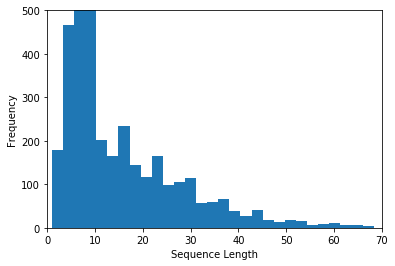

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def histograma(numWords):
    plt.hist(numWords, 50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.axis([0, 70, 0, 500])
    plt.show()
histograma(numWords)

Converting each sentence into a vector and adding it into a matrix of 'ids'

In [10]:
def integerSenteces(sent,maximum):
    i = 0
    embbeding = 0
    matrix = np.zeros((len(sent), maximum)) #250 X 6 (numEjem X Maximun)
    for s in sent:
        vector = np.zeros((maximum), dtype='int32')
        bound = maximum
        if len(s) < maximum:
            bound = len(s)    

        for token in range(0,bound): #No encuentra macu, porque la corta
            if s[token] not in wordsList:
                vector[token] = embbeding # ???
                #print(s[token])
            else:
                vector[token] = (wordsList.index(s[token]))
                embbeding = vector[token]
        matrix[i] = (vector)
        i += 1
    return matrix

In [11]:
X = integerSenteces(c_sent,maxSeqLength) 
print("Sentences integer representation: ",(X.shape))
print("Sentences: ",len(c_sent))
print("Integer format",X[249])
print("Normal format",c_sent[249])

Sentences integer representation:  (3695, 15)
Sentences:  3695
Integer format [  38.   32.   81. 1525. 3747.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.]
Normal format ['who', 'are', 'you', 'calling', 'fat']


Split the Data (stratify) into : Train && Test Sets

In [12]:
print("Sentences: ",len(X),"  Labels: ",len(emotion))
X_train, X_test, Y_train, Y_test = train_test_split(X, emotion, test_size=0.20, random_state=random.randrange(50), stratify=emotion)
print("X_train: ",len(X_train),"  Y_train: ",len(Y_train),"  X_test: ",len(X_test),"  Y_test: ",len(Y_test))

Sentences:  3695   Labels:  3695
X_train:  2956   Y_train:  2956   X_test:  739   Y_test:  739


Converting the Labels into Onehot Vectors

In [13]:
def toLabels(emo):
    classes = 6
    Y = np.zeros((len(emo), classes)) #Num Ejemplos X 6 emociones
    for e in range(0,len(emo)):
        vector = np.zeros((classes))
        vector[(emo[e] % (classes + 1)) - 1] = 1 
        Y[e] = vector
        #print(emo[e],"---",vector)
    return Y
 
Y_train = toLabels(Y_train)
Y_test = toLabels(Y_test)

In [14]:
print("Y_train: ",Y_train.shape," Num Ejem X # clases")
print("X_train: ",X_train.shape," Num Ejem X Maximun Lengh")
print("Y_test: ",Y_test.shape," Num Ejem X # clases")
print("X_test: ",X_test.shape," Num Ejem X Maximun Lengh")

Y_train:  (2956, 6)  Num Ejem X # clases
X_train:  (2956, 15)  Num Ejem X Maximun Lengh
Y_test:  (739, 6)  Num Ejem X # clases
X_test:  (739, 15)  Num Ejem X Maximun Lengh


RNN Model

In [27]:
batchSize = 50 #Tiene que ser multiplo del NumEjem
lstmUnits = 64
numClasses = 6

Declarando placeholders para los labels (6 emotions) && data imput

In [41]:
import tensorflow as tf
tf.reset_default_graph()
numDimensions = 300 

#labels = tf.placeholder(tf.float32, [batchSize, numClasses])
#input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])
labels = tf.placeholder(tf.float32, [None, numClasses])
input_data = tf.placeholder(tf.int32, [None, maxSeqLength])

Embeddings: Le damos el formato a nuestra data, aún no compilamos nada, solo declaramos

In [42]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

LSTM Model

In [43]:
#lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
#lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
fw_cells = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
bw_cells = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
fw_cells = tf.contrib.rnn.DropoutWrapper(cell=fw_cells, output_keep_prob=0.75)
bw_cells = tf.contrib.rnn.DropoutWrapper(cell=bw_cells, output_keep_prob=0.75)

data_len = tf.reduce_sum(tf.sign(input_data), 1)
rnn_outputs = tf.nn.bidirectional_dynamic_rnn(fw_cells, bw_cells,data,sequence_length= data_len, dtype=tf.float32)
#value, _ = tf.nn.dynamic_rnn(rnn_outputs, data, dtype=tf.float32)

In [44]:
#weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
#bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
#value = tf.transpose(value, [1, 0, 2])
#last = tf.gather(value, int(value.get_shape()[0]) - 1)
#prediction = (tf.matmul(last, weight) + bias)


attention_score = tf.nn.softmax(tf.contrib.slim.fully_connected(rnn_outputs, 1))
attention_out = tf.squeeze(
                tf.matmul(tf.transpose(rnn_outputs, perm=[0, 2, 1]), attention_score),
                axis=-1)

logits = tf.contrib.slim.fully_connected(attention_out, numClasses, activation_fn=None)
predictions = tf.argmax(logits, -1, output_type=tf.int32)
    

#correct_predictions = tf.equal(predictions, y)
correct_predictions = tf.equal(tf.argmax(predictions,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=self.global_step)      

ValueError: Dimension must be 5 but is 3 for 'transpose' (op: 'Transpose') with input shapes: [2,2,2,15,64], [3].

In [29]:
#correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
#accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [30]:
#learning_rate = 0.001
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

C:\Users\danie\Anaconda3\envs\Compositor\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Tensorboar

In [34]:
import datetime
def board(sess):
    tf.summary.scalar('Loss', loss)
    tf.summary.scalar('Accuracy', accuracy)
    tf.summary.histogram("Histogrma/hAccu", accuracy)
    merged = tf.summary.merge_all()
    logdir = "board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
    writer = tf.summary.FileWriter(logdir, sess.graph)
    return merged,writer

Confusion Matrix Plot

In [33]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [51]:
# Initializing the variables
init = tf.global_variables_initializer()
display_step = 10
numEjemplos = 6817         
iterations = 100

X_train:  6817   Y_train:  6817   X_test:  1019   Y_test:  1019
Epoch: 0001 cost= 1.798554864  accuracy= 23.629469490
Epoch: 0011 cost= 1.405795729  accuracy= 40.850634522
Epoch: 0021 cost= 1.138388635  accuracy= 54.047866516
Epoch: 0031 cost= 0.818610192  accuracy= 68.118800858
Epoch: 0041 cost= 0.537570710  accuracy= 80.205882122
Epoch: 0051 cost= 0.379106401  accuracy= 86.407727310
Epoch: 0061 cost= 0.296402169  accuracy= 89.690887884
Epoch: 0071 cost= 0.186872606  accuracy= 93.793829180
Epoch: 0081 cost= 0.137665755  accuracy= 95.453575604
Epoch: 0091 cost= 0.117096732  accuracy= 96.187427771
Optimization Finished!
Accuracy: 0.29735035
             precision    recall  f1-score   support

   Hapinnes       0.57      0.50      0.53       167
    Sadness       0.28      0.27      0.27       161
      Anger       0.23      0.25      0.24       169
     Disust       0.22      0.24      0.23       160
   Surprise       0.25      0.17      0.20       180
       Fear       0.23      0.29 

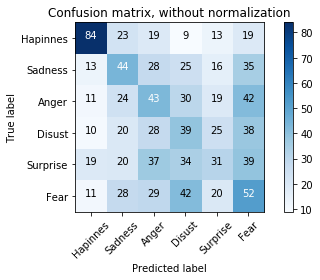

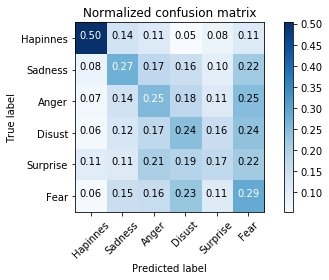

In [53]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Calling tensorboard function
    #---merged,writer = board(sess)
    print("X_train: ",len(X_train_b),"  Y_train: ",len(Y_train_b),"  X_test: ",len(X_test_b),"  Y_test: ",len(Y_test_b))

    # Training cycle
    for epoch in range(iterations):
        avg_cost = 0.
        avg_accu = 0.
        total_batch = int(numEjemplos/batchSize)
        #Create X groups of (50,6) Labels && (50,maximum) Examples
        X_batches = np.array_split(X_train_b, total_batch)
        Y_batches = np.array_split(Y_train_b, total_batch)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            #print("X: ",batch_x.shape)
            #print("Y: ",batch_y.shape)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c , accu= sess.run([optimizer, loss, accuracy], feed_dict={input_data: batch_x,
                                                          labels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            avg_accu += accu / total_batch

            #Write summary to Tensorboard
            '''if (epoch % 10 == 0):
                summary = sess.run(merged, {input_data: batch_x, labels: batch_y})
                writer.add_summary(summary, epoch)'''
            

            #Save the network every 10,000 training iterations
            #if (i % 10000 == 0 and i != 0):
                # save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
                 # print("saved to %s" % save_path)
            #writer.close()

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)," accuracy=", "{:.9f}".format(avg_accu*100))
    print("Optimization Finished!")
    
    #Test Model LSTM  
    correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correctPred, "float"))
    print("Accuracy:", accuracy.eval({input_data: X_test_b, labels: Y_test_b}))
    
    #Matriz de confusion

    #print("Test Samples, Class Predictions: ")
    #----Result es mi tensor prediction convertido a np.array
    result = tf.argmax(prediction , 1).eval({input_data: X_test_b, labels: Y_test_b})
    #print(result.shape)
    
    
    #print("Test Samples: ")
    test = (tf.argmax(Y_test_b , 1).eval()) #Convierte de [0,0,1,0,0] a [2] y lo hace np.array
    #print(test.shape)
    #print("Conversion: ")
    #for i in range(0,len(test)):
        #print(test[i],"---",Y_test[i],"---",result[i])
      

    from sklearn.metrics import confusion_matrix
    y_true = test
    y_pred = result
    #print(confusion_matrix(y_true, y_pred))
    class_names = ["Hapinnes","Sadness","Anger","Disust","Surprise","Fear"]

    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()


In [46]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  
print('Balance',Counter(emotion))

Balance Counter({1: 1284, 2: 640, 3: 528, 6: 488, 5: 486, 4: 269})


In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
#Banlancea ADASYN
X_balance, Y_balance = ADASYN().fit_sample(X,emotion)
print('Balance',Counter(Y_balance))

Balance Counter({6: 1402, 5: 1384, 3: 1297, 1: 1284, 2: 1242, 4: 1227})


In [48]:
print(X_balance.shape," ",Y_balance.shape)
print(len(X)," ",len(emotion))

(7836, 15)   (7836,)
3695   3695


In [49]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_balance, Y_balance, test_size=0.13, random_state=random.randrange(50), stratify=Y_balance)
print("X_train: ",len(X_train_b),"  Y_train: ",len(Y_train_b),"  X_test: ",len(X_test_b),"  Y_test: ",len(Y_test_b))

X_train:  6817   Y_train:  6817   X_test:  1019   Y_test:  1019


In [50]:
Y_train_b = toLabels(Y_train_b)
Y_test_b = toLabels(Y_test_b)

Otro Modelo: Solo balanceamos Trainset

In [ ]:
#Averogua ottros modelos
#Cambie el keep_drop
#Cambia learning rate
#Cambie num unidades 128?
#Prueba con tu modelo